In [2]:
import sys
sys.path.append('/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana')

In [3]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to plot the range of the liely range of SW_FB:

import netCDF4 as nc
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
# import PyNIO as Nio #deprecated
import pandas as pd
import glob
from scipy.stats import *
from copy import deepcopy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

from area_mean import *
from scipy.optimize import curve_fit
# import seaborn as sns
from copy import deepcopy
from useful_func_cy import *

In [4]:
# 12 cmip6 model: deck_nas = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']

exp = 'piControl'
    
# CMIP6: 31 (30: BCCCSMCM2MR)
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCCSMCM2MR = {'modn': 'BCC-CSM2-MR', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CMCCCM2SR5 = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6', 
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2WACCMFV2 = {'modn': 'CESM2-WACCM-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CNRMCM61 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMCM61HR = {'modn': 'CNRM-CM6-1-HR', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CNRMESM21 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

ECEarth3 = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
ECEarth3Veg = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE22G = {'modn': 'GISS-E2-2-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
               'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
#             'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp(Daniel says that HadGEM3-GC31 not using p-level, so doesn't have variables on p-level
INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6', 
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
MIROCES2L = {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
                  'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
                'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NESM3 = {'modn': 'NESM3', 'consort': 'NUIST', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NorESM2MM = {'modn': 'NorESM2-MM', 'consort': 'NCC', 'cmip': 'cmip6',
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
SAM0 = {'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6', 
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
TaiESM1 = {'modn': 'TaiESM1', 'consort': 'AS-RCEC', 'cmip': 'cmip6', 
                 'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

# CMIP5: 20 (18, ACCESS10, ACCESS13)
ACCESS10 = {'modn': 'ACCESS1-0', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
ACCESS13 = {'modn': 'ACCESS1-3', 'consort': 'CSIRO-BOM', 'cmip': 'cmip5',   # 2-d (145) and 3-d (146) variables have different lat shape
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
BNUESM = {'modn': 'BNU-ESM', 'consort': 'BNU', 'cmip': 'cmip5',
          'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

CCSM4 = {'modn': 'CCSM4', 'consort': 'NCAR', 'cmip': 'cmip5',
             'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CNRMCM5 = {'modn': 'CNRM-CM5', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CSIRO_Mk360 = {'modn': 'CSIRO-Mk3-6-0', 'consort': 'CSIRO-QCCCE', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
CanESM2 = {'modn': 'CanESM2', 'consort': 'CCCma', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSg2 = {'modn': 'FGOALS-g2', 'consort': 'LASG-CESS', 'cmip': 'cmip5',   # missing 'prw' in piControl
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
FGOALSs2 = {'modn': 'FGOALS-s2', 'consort': 'LASG-IAP', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLCM3 = {'modn': 'GFDL-CM3', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2H = {'modn': 'GISS-E2-H', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GISSE2R = {'modn': 'GISS-E2-R', 'consort': 'NASA-GISS', 'cmip': 'cmip5',
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
IPSLCM5ALR = {'modn': 'IPSL-CM5A-LR', 'consort': 'IPSL', 'cmip': 'cmip5',
               'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MIROC5 = {'modn': 'MIROC5', 'consort': 'MIROC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMMR = {'modn': 'MPI-ESM-MR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
NorESM1M = {'modn': 'NorESM1-M', 'consort': 'NCC', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

MIROCESM = {'modn': 'MIROC-ESM', 'consort': 'MIROC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MRICGCM3 = {'modn': 'MRI-CGCM3', 'consort': 'MRI', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
MPIESMLR = {'modn': 'MPI-ESM-LR', 'consort': 'MPI-M', 'cmip': 'cmip5',
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
bcccsm11 = {'modn': 'bcc-csm1-1', 'consort': 'BCC', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2G = {'modn': 'GFDL-ESM2G', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
            'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}
GFDLESM2M = {'modn': 'GFDL-ESM2M', 'consort': 'NOAA-GFDL', 'cmip': 'cmip5', 
           'exper': exp, 'ensmem': 'r1i1p1', "typevar": 'Amon'}

# cmip5 + cmip6
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM21, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1, INM_CM48, MPIESM12LR, AWICM11MR, CMCCCM2SR5, CESM2WACCMFV2, CNRMCM61, CNRMCM61HR, ECEarth3, ECEarth3Veg, GISSE22G, MIROCES2L, NESM3, NorESM2MM, TaiESM1, BNUESM, CCSM4, CNRMCM5, CSIRO_Mk360, CanESM2, FGOALSg2, FGOALSs2, GFDLCM3, GISSE2H, GISSE2R, IPSLCM5ALR, MIROC5, MPIESMMR, NorESM1M, MIROCESM, MRICGCM3, MPIESMLR, bcccsm11, GFDLESM2G, GFDLESM2M]  # current # 30 + 20 = 50
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM21', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1', 'INM_CM48', 'MPIESM12LR', 'AWICM11MR', 'CMCCCM2SR5', 'CESM2WACCMFV2', 'CNRMCM61', 'CNRMCM61HR', 'ECEarth3', 'ECEarth3Veg', 'GISSE22G', 'MIROCES2L', 'NESM3', 'NorESM2MM', 'TaiESM1', 'BNUESM', 'CCSM4', 'CNRMCM5', 'CSIRO_Mk360', 'CanESM2', 'FGOALSg2', 'FGOALSs2', 'GFDLCM3', 'GISSE2H', 'GISSE2R', 'IPSLCM5ALR', 'MIROC5', 'MPIESMMR', 'NorESM1M', 'MIROCESM', 'MRICGCM3', 'MPIESMLR', 'bcccsm11', 'GFDLESM2G', 'GFDLESM2M']  # current # 30 + 20 = 50


In [5]:
# Calculate 5*5 bin array for variables (LWP, CCFs) in Sounthern Ocean Region:
#..set are-mean range and define function
s_range = arange(-90., 90., 5.) + 2.5  #..global-region latitude edge: (36)
x_range = arange(-180., 180., 5.)  #..logitude sequences edge: number: 72
y_range = arange(-85, -40., 5.) +2.5  #..southern-ocaen latitude edge: 9

path1 = '/glade/scratch/chuyan/CMIP_output/CMIP_lrm_RESULT/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Tan_et_al_2023_JGR-A__/plot_file/'


In [6]:
# Read CMIP5/ 6 Cloud feedbacks data

fn_cmip5 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP5_cld_fbks.nc'

fn_cmip6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Course_objective_ana/CMIP6_cld_fbkd_July12.nc'

# glob.glob(fn_cmip5)
f_cmip5 = nc.Dataset(fn_cmip5, 'r')

f_cmip6 = nc.Dataset(fn_cmip6, 'r')

print(f_cmip5.variables['model'])

<class 'netCDF4._netCDF4.Variable'>
float64 model(model)
    realtopology: linear
    long_name: ['ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3' 'NorESM1-M' 'NorESM1-ME' 'bcc-csm1-1-m' 'bcc-csm1-1' 'inmcm4']
unlimited dimensions: 
current shape = (29,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [7]:
# variables from Zelinka's SWfb files:
lat_mz = np.asarray(f_cmip6.variables['latitude'])
bound_lat_mz = np.asarray(f_cmip6.variables['bounds_latitude'])

lon_mz = np.asarray(f_cmip6.variables['longitude'])
bound_lon_mz = np.asarray(f_cmip6.variables['bounds_longitude'])

# convert longitude matrix from (0, 360) to (-180., 180.):
lon_mz2 = lon_mz[:]*1.
bound_lon_mz2 = bound_lon_mz[:] * 1.
lon_mz2[lon_mz2 > 180] = lon_mz2[lon_mz2 > 180]-360.
bound_lon_mz2[bound_lon_mz2 > 180] = bound_lon_mz2[bound_lon_mz2 > 180] - 360
ind_lon = argsort(lon_mz2)
lon_mz2 = lon_mz2[ind_lon]

bound_lon_mz2 = bound_lon_mz2[ind_lon, :]
# print(lon_mz2)
# print(bound_lon_mz2)
# model_names:
cmip6model_nas = f_cmip6.variables['model'].long_name
cmip5model_nas = f_cmip5.variables['model'].long_name

cmip6_nas = cmip6model_nas[1:-1].split()
for i in range(len(cmip6_nas)):
    cmip6_nas[i] = cmip6_nas[i][1:-1]
    
cmip5_nas = cmip5model_nas[1:-1].split()
for i in range(len(cmip5_nas)):
    cmip5_nas[i] = cmip5_nas[i][1:-1]
# print(cmip6_nas)
# print(cmip5_nas)

model_nas = []
model_nas = np.append(cmip6_nas, cmip5_nas)
print(model_nas)

# SW_cloud_Feedback:
sw_cld_fb_mz = []

cmip6_sw_cld_fb_mz = np.asarray(f_cmip6.variables['SWCLD_fbk6_map'])
cmip5_sw_cld_fb_mz = np.asarray(f_cmip5.variables['SWCLD_fbk5_map'])

sw_cld_fb_mz = np.append(cmip6_sw_cld_fb_mz, cmip5_sw_cld_fb_mz, axis = 2)
print(sw_cld_fb_mz.shape)

# Handle nan value
sw_cld_fb_mz = np.where(sw_cld_fb_mz!=1.e+20, sw_cld_fb_mz, np.nan)
ind_nan = np.isnan(sw_cld_fb_mz)
# print(np.nonzero(ind_nan==True))  # #0

reshape_sw_cld_fb = np.transpose(sw_cld_fb_mz,(2, 0, 1))

print(reshape_sw_cld_fb.shape)
# SO_sw_cldfb = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi1+1+1),:], y_range_swcld, x_range_swcld) # -85.S ~ -40.S
SO_sw_cldfb = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -40.])
# SO_sw_cldfb_5085 = area_mean(reshape_sw_cld_fb[:,(latsi0):(latsi2+1+1),:], y_range_swcld5085, x_range_swcld) # -85.S ~ -50.S
SO_sw_cldfb_5085 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-85., -50.])
# SO_sw_cldfb_4050 = area_mean(reshape_sw_cld_fb[:,(latsi2+1):(latsi1+1+1),:], y_range_swcld4050, x_range_swcld) # -50.S ~ -40.S
SO_sw_cldfb_4050 = latitude_mean(reshape_sw_cld_fb[:,:,:], lat_mz, lon_mz, lat_range=[-50., -40.])

print(SO_sw_cldfb.shape)

# The 50 GCMs' SW_FB at different Latitude Bands:
SW_FB_4085 = []
SW_FB_5085 = []
SW_FB_4050 = []

for i in range(len(deck2)):
    for j in range(len(SO_sw_cldfb)):
        # 50
        if (deck2[i]['modn']== model_nas[j]):
            # if (i in modelconstraintbystep1_nas):
            SW_FB_4085 = np.append(SW_FB_4085, SO_sw_cldfb[j])
            SW_FB_4050 = np.append(SW_FB_4050, SO_sw_cldfb_4050[j])
            SW_FB_5085 = np.append(SW_FB_5085, SO_sw_cldfb_5085[j])
    

print(SW_FB_4085.shape)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'BCC-CSM2-MR' 'BCC-ESM1'
 'CAMS-CSM1-0' 'CESM2' 'CESM2-FV2' 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CIESM'
 'CMCC-CM2-SR5' 'CMCC-ESM2' 'CNRM-CM6-1' 'CNRM-CM6-1-HR' 'CNRM-ESM2-1'
 'CanESM5' 'E3SM-1-0' 'EC-Earth3' 'EC-Earth3-AerChem' 'EC-Earth3-Veg'
 'FGOALS-f3-L' 'FGOALS-g3' 'GFDL-CM4' 'GFDL-ESM4' 'GISS-E2-1-G'
 'GISS-E2-1-H' 'GISS-E2-2-G' 'HadGEM3-GC31-LL' 'HadGEM3-GC31-MM'
 'IITM-ESM' 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM5A2-INCA' 'IPSL-CM6A-LR'
 'IPSL-CM6A-LR-INCA' 'KACE-1-0-G' 'MIROC-ES2L' 'MIROC6' 'MPI-ESM-1-2-HAM'
 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1' 'UKESM1-0-LL'
 'ACCESS1-0' 'ACCESS1-3' 'BNU-ESM' 'CCSM4' 'CNRM-CM5' 'CSIRO-Mk3-6-0'
 'CanESM2' 'FGOALS-g2' 'FGOALS-s2' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M'
 'GISS-E2-H' 'GISS-E2-R' 'HadGEM2-ES' 'IPSL-CM5A-LR' 'IPSL-CM5A-MR'
 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC5' 'MPI-ESM-LR' 'MPI-ESM-MR' 'MPI-ESM-P'
 'MRI-CGCM3' 'NorESM1-M' 'N

In [8]:
# The area ratio of 3 latitude bands' to the global earth's surface area.:
R = 6.3781 * 10**6
S_global_sfc = 4 * np.pi * R**2
print(S_global_sfc)
print(np.sin(np.deg2rad(180. / 2)))
S_4050_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-40.)) - np.sin(np.deg2rad(-50.)))
print(S_4050_sfc)
S_5085_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-50.)) - np.sin(np.deg2rad(-85.)))
S_4085_sfc = 2 * np.pi * R**2 * (np.sin(np.deg2rad(-40.)) - np.sin(np.deg2rad(-85.)))

ratio_4085 = S_4085_sfc / S_global_sfc
ratio_4050 = S_4050_sfc / S_global_sfc
ratio_5085 = S_5085_sfc / S_global_sfc
print(ratio_4085, np.array([-0.92572, 1.52770]) * ratio_4085)

511201962310544.9
1.0
31504567559423.332
0.17670354420260315 [-0.163578  0.26995 ]


In [9]:
# the Constraint lists of models from Nov22_OBS_Constraint:

con_list_4085 = [2,  3,  4,  6,  7, 11, 13, 19, 20, 23, 24, 25, 26, 30, 31, 35, 37, 38, 39, 41, 43]
con_list_4050 = [6,  7, 10, 14, 16, 24, 25, 35, 37, 38]
con_list_5085 = [3,  4,  6,  7, 12, 13, 20, 23, 24, 25, 26, 29, 35, 37, 38, 39, 40, 41, 43, 45]

print(SW_FB_4085[con_list_4085])

[ 0.66571835  1.21259446  0.76889119 -0.60610591 -0.23981515  0.57282465
 -0.81323349  0.23299922  1.52770246 -0.23915645 -0.33767653 -0.48081179
 -0.86082588 -0.28330926 -0.15410108 -0.46449433 -0.07059348 -0.16023765
 -0.59894597 -0.92571557 -0.04742896]


In [10]:


# the area-weighted Latitudinal bands' SW_FB: mean and uncertainty (standard deviation):

Mean_weighted_SW_fb_4085 = np.mean(SW_FB_4085[con_list_4085] * ratio_4085)
Std_weighted_SW_fb_4085 = np.std(SW_FB_4085[con_list_4085] * ratio_4085)

print("mean of SW_fb at 4085: ", np.mean(SW_FB_4085[con_list_4085] * ratio_4085),
       "; The standard deviation of SW_fb at 4085: ", np.std(SW_FB_4085[con_list_4085] * ratio_4085))

Mean_weighted_SW_fb_4050 = np.mean(SW_FB_4050[con_list_4050] * ratio_4050)
Std_weighted_SW_fb_4050 = np.std(SW_FB_4050[con_list_4050] * ratio_4050)

print("mean of SW_fb at 4050: ", np.mean(SW_FB_4050[con_list_4050] * ratio_4050),
      "; The standard deviation of SW_fb at 4050: ", np.std(SW_FB_4050[con_list_4050] * ratio_4050))

Mean_weighted_SW_fb_5085 = np.mean(SW_FB_5085[con_list_5085] * ratio_5085)
Std_weighted_SW_fb_5085 = np.std(SW_FB_5085[con_list_5085] * ratio_5085)

print("mean of SW_fb at 5085: ", np.mean(SW_FB_5085[con_list_5085] * ratio_5085), 
      "; The standard deviation of SW_fb at 5085: ", np.std(SW_FB_5085[con_list_5085] * ratio_5085))

mean of SW_fb at 4085:  -0.010953273369399745 ; The standard deviation of SW_fb at 4085:  0.11528286743505387
mean of SW_fb at 4050:  0.012205463239030129 ; The standard deviation of SW_fb at 4050:  0.027923493697655608
mean of SW_fb at 5085:  -0.08263120261733607 ; The standard deviation of SW_fb at 5085:  0.044231741812593754


In [11]:
# Calculate the constraint range of 40 -- 85^o S SW_fb from combining the (40 -- 50) & (50 -- 85) ranges' constraints and propagae their uncertainty:
Mean_weighted_SWfb_SO = np.mean(SW_FB_4085 * ratio_4085)
Std_weighted_SWfb_SO = np.std(SW_FB_4085 * ratio_4085)

Mean_Constraint_weighted_SWfb_SO = (Mean_weighted_SW_fb_4050 + Mean_weighted_SW_fb_5085)
Std_Constraint_weighted_SWfb_SO = np.sqrt((1.* Std_weighted_SW_fb_4050**2 + 1.* Std_weighted_SW_fb_5085**2 + 2.*1.*1.*(pearsonr(SW_FB_4050, SW_FB_5085)[0] * Std_weighted_SW_fb_4050 * Std_weighted_SW_fb_5085)))

print(pearsonr(SW_FB_4050, SW_FB_5085)[0])

0.5703811855000155


In [12]:
print(Mean_weighted_SWfb_SO, Mean_weighted_SW_fb_4085, Mean_Constraint_weighted_SWfb_SO)
print(Std_weighted_SWfb_SO, Std_weighted_SW_fb_4085, Std_Constraint_weighted_SWfb_SO)

range_SWfb_4085 = np.array([Mean_weighted_SW_fb_4085 - 1.96* Std_weighted_SW_fb_4085, Mean_weighted_SW_fb_4085 + 1.96* Std_weighted_SW_fb_4085])
range_SWfb_SO = np.array([Mean_weighted_SWfb_SO - 1.96* Std_weighted_SWfb_SO, Mean_weighted_SWfb_SO + 1.96* Std_weighted_SWfb_SO])
range_Con_SWfb_SO = np.array([Mean_Constraint_weighted_SWfb_SO - 1.96* Std_Constraint_weighted_SWfb_SO, Mean_Constraint_weighted_SWfb_SO + 1.96* Std_Constraint_weighted_SWfb_SO])

print(range_SWfb_SO, range_SWfb_4085, range_Con_SWfb_SO)
print(np.min(SW_FB_4085 * ratio_4085), np.max(SW_FB_4085 * ratio_4085))

-0.08213870000686178 -0.010953273369399745 -0.07042573937830594
0.12487283220252587 0.11528286743505387 0.0643826803012796
[-0.32688945  0.16261205] [-0.23690769  0.21500115] [-0.19661579  0.05576431]
-0.2770796771091642 0.2699504398454928


In [14]:
# IF high EffCS model within the 95% confidence range?
model_withle95SOSWCLD = []
for i in range(len(deck2)):
    
    if ((SW_FB_4085[i] * ratio_4085) >= 0.05576431):
        
        model_withle95SOSWCLD.append(i)
    
print(model_withle95SOSWCLD)

[2, 3, 4, 11, 12, 20, 29]


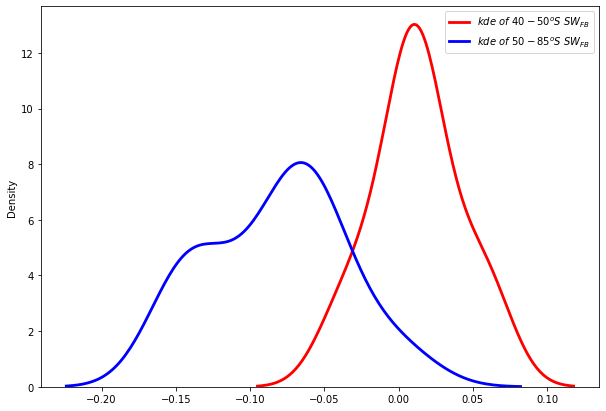

In [15]:
import seaborn as sns

plt.figure(figsize = (10, 7))

sns.kdeplot((SW_FB_4050[con_list_4050] * ratio_4050), common_norm = True, linewidth = 2.8, c='red', label = r"$ kde\ of\ 40-50^{o}S\ SW_{FB} $")

sns.kdeplot((SW_FB_5085[con_list_5085] * ratio_5085), common_norm = True, linewidth = 2.8, c='blue', label = r"$ kde\ of\ 50-85^{o}S\ SW_{FB} $")

plt.legend()

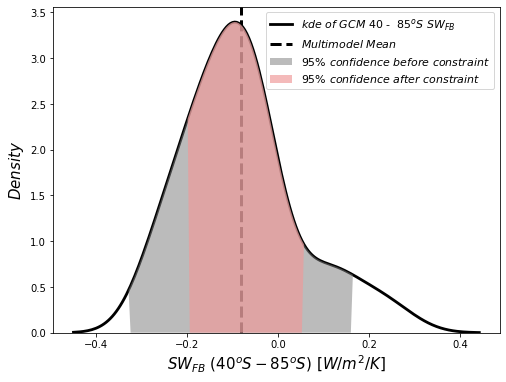

In [16]:
# kde PLot: 

import seaborn as sns
x1 = np.arange(np.min(range_SWfb_SO), np.max(range_SWfb_SO), 40)
x2 = np.arange(np.min(range_Con_SWfb_SO), np.max(range_Con_SWfb_SO), 40)
plt.figure( figsize = (16.0/2., 12.0/2.))

kde_plot = sns.kdeplot((SW_FB_4085 * ratio_4085), common_norm = True, linewidth = 2.8, c = 'k', label = r'$ kde\ of\ GCM\ $40 -  85$^{o} S\ SW_{FB}$')
# get the kernel distribution curve line for later fill:
kde_x, kde_y = kde_plot.lines[0].get_data()

plt.axvline(Mean_weighted_SWfb_SO, c = 'k', linewidth = 3., linestyle = '--', label = r'$Multimodel\ Mean$', zorder = 97)

plt.fill_between(kde_x, kde_y, where=(kde_x > np.min(range_SWfb_SO)) & (kde_x < np.max(range_SWfb_SO)) , 
                interpolate=True, facecolor = 'gray', alpha = 0.53, label = r'$ 95 \%\ confidence\ before\ constraint $', zorder = 98)
plt.fill_between(kde_x, kde_y, where=(kde_x > np.min(range_Con_SWfb_SO)) & (kde_x < np.max(range_Con_SWfb_SO)) , 
                interpolate=True, facecolor = '#EF9A9A', alpha = 0.68, label = r'$ 95 \%\ confidence\ after\ constraint $', zorder = 99)

plt.xlabel(r"$ SW_{FB}\ (40^{o} S - 85^{o} S)\ [W/ m^{2}/ K] $", fontsize = 15)
plt.ylabel(r"$ Density $", fontsize = 15)

plt.legend(fontsize = 11)

# plt.savefig(path6+ "Fig_10.jpg", bbox_inches = "tight", dpi = 500)

In [23]:
# print(kde_x, kde_y)

xinc = kde_x[2] - kde_x[1]
print(kde_x[3] - kde_x[2], kde_x[2] - kde_x[1])

print(kde_x.shape, kde_y.shape)

print(np.sum(kde_y[0:] * xinc))

0.004488133386847004 0.004488133386847004
(200,) (200,)
0.9999093838436859


In [24]:
# import Zelinka's data for current CMIP5, CMIP6 models:

import json
f = open('cmip56_forcing_feedback_ecs.json','r')
data = json.load(f)

data.keys()

dict_keys(['CMIP5', 'CMIP6', 'metadata', 'provenance'])

In [25]:
# read through CMIP5 + CMIP6 :
EffCS = []
SWCLD = []

for i in range(len(deck_nas2)):
    
    if deck2[i]['cmip'] == 'cmip5':
        EffCS.append(data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS'])
        SWCLD.append(data['CMIP5'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD'])
        # append()
    if deck2[i]['cmip'] == 'cmip6':
        
        if deck2[i]['modn'] == 'EC-Earth3':
            EffCS.append(data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['ECS'])
            SWCLD.append(data['CMIP6'][deck2[i]['modn']]['r8i1p1f1']['SWCLD'])
        else:
            EffCS.append(data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['ECS'])
            SWCLD.append(data['CMIP6'][deck2[i]['modn']][deck2[i]['ensmem']]['SWCLD'])
        
    



In [26]:
print(SWCLD)

SW_CLD = np.asarray(SWCLD)
Eff_CS = np.asarray(EffCS)

[0.02229493412312672, -0.018977452095036106, 0.7944544940171103, 0.9514166569676963, 1.0476148653974426, 0.03116854950157273, -0.6349416452897468, -0.5293336034493376, 0.14242772625686542, 0.11843090267562513, -0.13125504312338965, 0.8890847252446356, 0.7540423909074488, -0.731886236769336, 0.026291736409965426, -0.7193458057599514, -0.19398971558995093, -0.6774801583907203, -0.309503741983036, 0.4837074536713247, 0.9746100045399928, -0.02194159123060901, -0.09998430040627783, 0.051233724903400765, 0.019625181024840434, -0.8773883547213506, -0.34994722957890567, -0.14795846385141292, 0.2954004485931316, 0.5452482045562381, -0.22941468952863192, -0.08697902485273334, -0.21267740521414022, 0.5507943676473083, -0.28788305287223215, -0.06406463362826244, -0.414358224693658, 0.6001088209112944, -0.7231955413668865, -0.8034189958176161, 0.611282396207118, -0.38089838798923265, -0.074808107107569, -0.024677540503082258, 0.20132758089402952, 0.24581700774755166, -0.1585349769341558, -0.1493014

In [19]:
print(Eff_CS)

[3.25472004 5.63890308 5.1479152  5.16462663 4.68428568 4.79409612
 2.71040476 3.11734108 4.69916088 3.1299513  2.60179097 3.72287893
 5.30658977 2.87032985 3.89012524 2.29041175 1.82713996 3.02544019
 3.16050685 3.55334811 4.79855539 4.90365062 4.32707288 4.260067
 4.33121301 2.42638864 2.66052644 4.76444711 2.48677158 4.35549011
 4.03945763 2.94046748 3.25181288 4.08577933 3.70181357 3.36874904
 4.18348546 3.95176282 2.30550771 2.11943442 4.13343153 2.71491592
 3.44780922 2.87103759 4.64556708 2.60951317 3.62807204 2.81772765
 2.42665561 2.44005218]


In [32]:
model_ECSle45 = []

for k in range(len(deck2)):
    
    if Eff_CS[k] > 4.5:
        model_ECSle45.append(k)
    
print(model_ECSle45)

[1, 2, 3, 4, 5, 8, 12, 20, 21, 27, 44]


In [38]:
print(model_withle95SOSWCLD)

[2, 3, 4, 11, 12, 19, 20, 29]
